# Compare the two runs on different days

In [7]:
import pandas as pd

run_1 = '400-2-27'
run_2 = '400-2-28'
df =  pd.read_csv('../Data/Laragen_Validation/variants.csv')
run_1_df = df[df['name'] == run_1].set_index('Well')
run_2_df = df[df['name'] == run_2].set_index('Well')


In [11]:
# They're in the same order, but let's still just set the index to be the well and then join them
df = run_1_df.join(run_2_df, how='inner', lsuffix=f'_{run_1}', rsuffix=f'_{run_2}')
df

,barcode_plate_400-2-27,name_400-2-27,refseq_400-2-27,variant_400-2-27,index_400-2-27,Plate_400-2-27,Barcode_400-2-27,ID_400-2-27,P value_400-2-27,Mixed Well_400-2-27,...,Plate_400-2-28,Barcode_400-2-28,ID_400-2-28,P value_400-2-28,Mixed Well_400-2-28,Variant_400-2-28,Average mutation frequency_400-2-28,Alignment Count_400-2-28,P adj. value_400-2-28,Manual check_400-2-28
Well,,,,,,,,,,,,,,,,,,,,,
A1,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,0,400-2-27,RB27_NB01,400-2-27_A1,1.000000e+00,NaN,...,400-2-28,RB28_NB01,400-2-28_A1,1.000000e+00,NaN,NaN,NaN,0.0,1.000000e+00,NaN
A2,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,1,400-2-27,RB27_NB02,400-2-27_A2,1.660000e-42,False,...,400-2-28,RB28_NB02,400-2-28_A2,1.130000e-29,False,C50T,0.941176,17.0,1.080000e-27,NaN
A3,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,2,400-2-27,RB27_NB03,400-2-27_A3,6.130000e-72,True,...,400-2-28,RB28_NB03,400-2-28_A3,3.420000e-68,True,A30G,0.906977,43.0,3.280000e-66,NaN
A4,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,3,400-2-27,RB27_NB04,400-2-27_A4,5.350000e-47,False,...,400-2-28,RB28_NB04,400-2-28_A4,1.290000e-41,True,A53G_A507G,0.794118,17.0,1.240000e-39,NaN
A5,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,4,400-2-27,RB27_NB05,400-2-27_A5,NaN,False,...,400-2-28,RB28_NB05,400-2-28_A5,NaN,False,#PARENT#,NaN,63.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,91,400-2-27,RB27_NB92,400-2-27_H8,1.000000e+00,NaN,...,400-2-28,RB28_NB92,400-2-28_H8,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN
H9,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,92,400-2-27,RB27_NB93,400-2-27_H9,1.000000e+00,NaN,...,400-2-28,RB28_NB93,400-2-28_H9,NaN,False,#PARENT#,NaN,51.0,NaN,NaN
H10,27,400-2-27,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,NaN,93,400-2-27,RB27_NB94,400-2-27_H10,NaN,False,...,400-2-28,RB28_NB94,400-2-28_H10,1.160000e-58,False,T197A,0.941176,34.0,1.120000e-56,NaN


## Check that they all agree on variants

In [18]:
correct, incorrect = 0, 0
aggree = []
for count_1, run1_variant, count_2, run2_variant in df[[ f'Alignment Count_{run_1}', f'Variant_{run_1}', f'Alignment Count_{run_2}', f'Variant_{run_2}']].values:
    if str(run1_variant) == str(run2_variant):
        correct += 1
        aggree.append('True')
    else:
        print(run1_variant, count_1, run2_variant, count_2)
        incorrect += 1
        aggree.append('False')
print(correct, incorrect)
df['Aggree'] = aggree

G365T 6.0 nan 0.0
A311G 22.0 nan nan
nan 0.0 #PARENT# 4.0
#PARENT# 5.0 T539C 2.0
nan 0.0 #PARENT# 53.0
#PARENT# 14.0 nan 0.0
#PARENT# 15.0 T271A 18.0
nan 0.0 T429C 41.0
#PARENT# 4.0 T336C 50.0
#PARENT# 8.0 nan 0.0
nan nan #PARENT# 51.0
#PARENT# 4.0 T197A 34.0
84 12


## Agreement between the two

In [17]:
print(correct/96)

0.875


Text(0.5, 1.0, 'Agreement between different barcode runs')

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

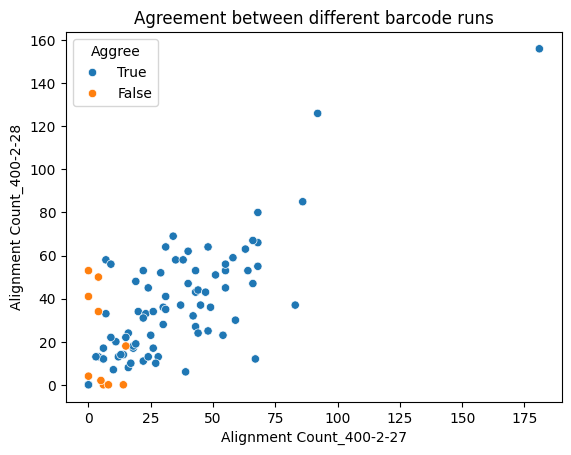

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(df, x=f'Alignment Count_{run_1}', y=f'Alignment Count_{run_2}', hue='Aggree')
plt.title('Agreement between different barcode runs')